# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [85]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

0.001 Average validation error: 0.11
0.001 Average validation variance: [0.54211448]
0.01 Average validation error: 0.11
0.01 Average validation variance: [0.54149283]
0.1 Average validation error: 0.11
0.1 Average validation variance: [0.53543683]
0.0 Average validation error: 0.345
0.0 Average validation variance: [38.70524012]
1.0 Average validation error: 0.11
1.0 Average validation variance: [0.48737058]
10.0 Average validation error: 0.06
10.0 Average validation variance: [0.33829825]
100.0 Average validation error: 0.04
100.0 Average validation variance: [0.23433591]
1000.0 Average validation error: 0.035
1000.0 Average validation variance: [0.32183157]
Finally choose: 100.0


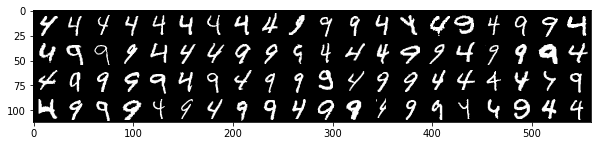

In [107]:
show_digit(X)
# Do feature normalization here
# begin answer

def feature_normal(X):
    avg = np.average(X, axis = 1).reshape(X.shape[0], 1)
    std = np.std(X, axis = 1).reshape(X.shape[0], 1)
    std[std == 0] = 1.0
    return (X - avg) / std

X_normal = feature_normal(X)
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')


from ridge import ridge

for i in range(len(lmbdas)):
    E_val, E_err = 0, 0
    choose_arr = [True] * (X.shape[1])
    for j in range(X.shape[1]):
        choose_arr[j] = False
        X_ = X_normal[:, choose_arr]
        y_ = y[:, choose_arr]
        choose_arr[j] = True
        w = ridge(X_, y_, lmbdas[i])
        predition = y[:, j] * np.dot(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))
        if predition <= 0:
            E_err += 1
        E_val += (y[:, j] - np.matmul(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))) ** 2    

    # Update lmbda according validation error
    # begin answer
    E_err /= X.shape[1]
    E_val /= X.shape[1]
    print (lmbdas[i], "Average validation error:", E_err)
    print (lmbdas[i], "Average validation variance:", E_val)
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer

print ("Finally choose:", lmbda)

In [113]:
# Do feature normalization to X_test, y_test
X_test_normal = feature_normal(X_test)

w = ridge(X_normal, y, 1000)
training_results = y * np.matmul(w.T, np.concatenate((np.ones((1, X_normal.shape[1])), X_normal), axis = 0))
training_error = np.sum(training_results <= 0) / X_normal.shape[1]
testing_results = y_test * np.matmul(w.T, np.concatenate((np.ones((1, X_test_normal.shape[1])), X_test_normal), axis = 0))
testing_error = np.sum(testing_results <= 0) / X_test_normal.shape[1]
print ("The square of w with lambda 1000:", np.linalg.norm(w[1:]))
print ("Training error with lambda  1000:", training_error)
print ("Testing error with lambda   1000:", testing_error)

w = ridge(X_normal, y, 100)
training_results = y * np.matmul(w.T, np.concatenate((np.ones((1, X_normal.shape[1])), X_normal), axis = 0))
training_error = np.sum(training_results <= 0) / X_normal.shape[1]
testing_results = y_test * np.matmul(w.T, np.concatenate((np.ones((1, X_test_normal.shape[1])), X_test_normal), axis = 0))
testing_error = np.sum(testing_results <= 0) / X_test_normal.shape[1]
print ("The square of w with lambda  100:", np.linalg.norm(w[1:]))
print ("Training error with lambda   100:", training_error)
print ("Testing error with lambda    100:", testing_error)

w = ridge(X_normal, y, 0)
training_results = y * np.matmul(w.T, np.concatenate((np.ones((1, X_normal.shape[1])), X_normal), axis = 0))
training_error = np.sum(training_results <= 0) / X_normal.shape[1]
testing_results = y_test * np.matmul(w.T, np.concatenate((np.ones((1, X_test_normal.shape[1])), X_test_normal), axis = 0))
testing_error = np.sum(testing_results <= 0) / X_test_normal.shape[1]
print ("The square of w without lambda:  ", np.linalg.norm(w[1:]))
print ("Training error without lambda:   ", training_error)
print ("Testing error without lambda:    ", testing_error)

The square of w with lambda 1000: 0.18387598169379504
Training error with lambda  1000: 0.01
Testing error with lambda   1000: 0.055248618784530384
The square of w with lambda  100: 0.3644870309752901
Training error with lambda   100: 0.0
Testing error with lambda    100: 0.06127574083375188
The square of w without lambda:   1.0131787470699385
Training error without lambda:    0.0
Testing error without lambda:     0.12305374183827222


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [138]:
from logistic_r import logistic_r

lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val, E_err = 0, 0
    choose_arr = [True] * (X.shape[1])
    for j in range(X.shape[1]):
        choose_arr[j] = False
        X_ = X_normal[:, choose_arr]
        y_ = y[:, choose_arr]
        choose_arr[j] = True
        w = logistic_r(X_, y_, lmbdas[i])
        #predition = y[:, j] * np.dot(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))
        #t = y * np.dot(np.squeeze(w.T), np.concatenate((np.ones((1, X.shape[1])), X_normal), axis = 0))
        if predition <= 0:
            E_err += 1
        E_val += (y[:, j] - np.matmul(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))) ** 2 
        
    # Update lmbda according validation error
    # begin answer
    E_err /= X.shape[1]
    E_val /= X.shape[1]
    print (lmbdas[i], "Average validation error:", E_err)
    print (lmbdas[i], "Average validation variance:", E_val)
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
    

0.001 Average validation error: 0.0
0.001 Average validation variance: [22.95213422]
0.01 Average validation error: 0.0
0.01 Average validation variance: [22.92972276]
0.1 Average validation error: 0.0
0.1 Average validation variance: [22.70751881]
0.0 Average validation error: 0.0
0.0 Average validation variance: [22.95462654]
1.0 Average validation error: 0.0
1.0 Average validation variance: [20.66472311]
10.0 Average validation error: 0.0
10.0 Average validation variance: [10.48175895]
100.0 Average validation error: 0.0
100.0 Average validation variance: [1.91789463]
1000.0 Average validation error: 0.0
1000.0 Average validation variance: [5.04255473]


In [141]:
w = logistic_r(X_normal, y, 100)
training_results = y * np.matmul(w.T, np.concatenate((np.ones((1, X_normal.shape[1])), X_normal), axis = 0))
training_error = np.sum(training_results <= 0) / X_normal.shape[1]
testing_results = y_test * np.matmul(w.T, np.concatenate((np.ones((1, X_test_normal.shape[1])), X_test_normal), axis = 0))
testing_error = np.sum(testing_results <= 0) / X_test_normal.shape[1]
print ("The square of w with lambda  100:", np.linalg.norm(w[1:]))
print ("Training error with lambda   100:", training_error)
print ("Testing error with lambda    100:", testing_error)

w = logistic_r(X_normal, y, 0)
training_results = y * np.matmul(w.T, np.concatenate((np.ones((1, X_normal.shape[1])), X_normal), axis = 0))
training_error = np.sum(training_results <= 0) / X_normal.shape[1]
testing_results = y_test * np.matmul(w.T, np.concatenate((np.ones((1, X_test_normal.shape[1])), X_test_normal), axis = 0))
testing_error = np.sum(testing_results <= 0) / X_test_normal.shape[1]
print ("The square of w without lambda:  ", np.linalg.norm(w[1:]))
print ("Training error without lambda:   ", training_error)
print ("Testing error without lambda:    ", testing_error)

The square of w with lambda  100: 0.6403386339032339
Training error with lambda   100: 0.0
Testing error with lambda    100: 0.053239578101456554
The square of w without lambda:   1.8812149422703894
Training error without lambda:    0.0
Testing error without lambda:     0.04922149673530889
